In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

## Network
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import pylab as plt 
from itertools import count 
from operator import itemgetter 
from networkx.drawing.nx_agraph import graphviz_layout 
import pylab

In [15]:
#- Import data 
df = pd.read_csv('member-edges.csv')
print(len(df))

1176368


In [19]:
df

,Unnamed: 0,member1,member2,weight
0,0,198737924,220654721,1
1,1,198737924,208201738,1
2,2,198737924,88664332,1
3,3,198737924,8640526,1
4,4,198737924,56356372,1
...,...,...,...,...
995,995,226754592,237417427,1
996,996,226754592,216892372,1
997,997,226754592,220648421,1
998,998,226754592,220916721,1


In [16]:
df = df[0 : 1000]

No handles with labels found to put in legend.


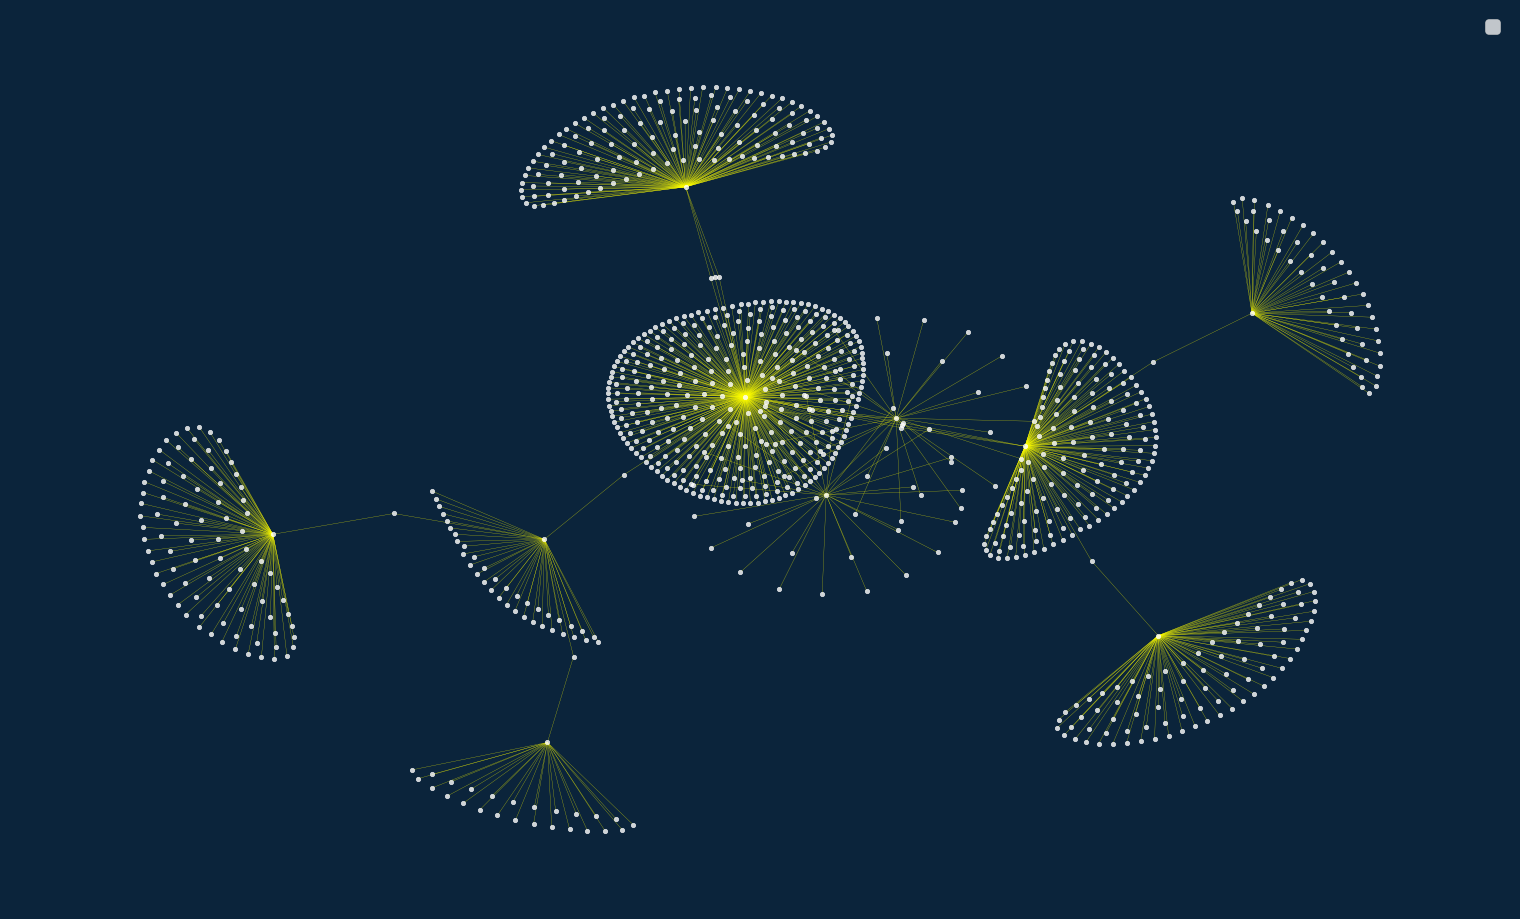

In [17]:
pd.set_option('precision',10)
G = nx.from_pandas_edgelist(df, 'member1', 'member2', create_using = nx.Graph())

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]
#size = [(degree[n]) for n in nodes]

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (15,9), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size = 10, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
fig.set_facecolor('#0B243B')

plt.legend()
plt.show()

In [18]:
################ Analyse ###############

# Calculation of the different coefficients of centrality and storage in a dataframe of independent nodes

# We will create an output dataframe with the nodes and their attributes to store the results of the analysis

# Degree of each node
for i in sorted(G.nodes()):
    G.node[i]['Degree'] = G.degree(i)


#extraction of network nodes in a dataframe
nodes_data = pd.DataFrame([i[1] for i in G.nodes(data=True)], index=[i[0] for i in G.nodes(data=True)])
nodes_data = nodes_data.sort_index(by='Degree',ascending= False)
nodes_data.index.names=['ID']
nodes_data.reset_index(level=0, inplace=True)


# Betweenness centrality 
bet_cen = nx.betweenness_centrality(G)
df_bet_cen = pd.DataFrame.from_dict(bet_cen, orient='index')
df_bet_cen.columns = ['betweenness_centrality']
df_bet_cen.index.names = ['ID']
df_bet_cen.reset_index(level=0, inplace=True)
analyse= pd.merge(nodes_data,df_bet_cen, on = ['ID'])

# Clustering coefficient 
clust_coefficients = nx.clustering(G)
df_clust = pd.DataFrame.from_dict(clust_coefficients, orient='index')
df_clust.columns = ['clust_coefficient']
df_clust.index.names = ['ID']
df_clust.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_clust, on = ['ID'])

# Closeness centrality 
clo_cen = nx.closeness_centrality(G)
df_clo = pd.DataFrame.from_dict(clo_cen, orient='index')
df_clo.columns = ['closeness_centrality']
df_clo.index.names = ['ID']
df_clo.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_clo, on = ['ID'])

# Eigenvector centrality
#eig_cen = nx.eigenvector_centrality(G)
#eig_cen = nx.katz_centrality(G)
eig_cen = nx.eigenvector_centrality_numpy(G)
df_eig = pd.DataFrame.from_dict(eig_cen, orient='index')
df_eig.columns = ['eigenvector_centrality']
df_eig.index.names = ['ID']
df_eig.reset_index(level=0, inplace=True)
analyse= pd.merge(analyse, df_eig, on = ['ID'])


print(analyse)

AttributeError: 'Graph' object has no attribute 'node'